In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


In [2]:
# Loading the datatset.
train_data=pd.read_csv("/kaggle/input/playground-series-s5e12/train.csv")
test_data=pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")
sample_data=pd.read_csv("/kaggle/input/playground-series-s5e12/sample_submission.csv")

In [3]:
#Setting display option to max 26 columns
pd.set_option('display.max_columns', 26)

In [4]:
# Train_dataset with top 5 rowa
train_data.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [5]:
# Test_dataset with top 5 rowa
test_data.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,75,173,43,99,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,79,177,59,87,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [6]:
# Sample_dataset with top 5 rowa
sample_data.head()

,id,diagnosed_diabetes
0,700000,0
1,700001,0
2,700002,0
3,700003,0
4,700004,0


In [7]:
#Checking train dataset info.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [8]:
#Checking test dataset info.
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

In [9]:
# Droping the ID columns which not related to our data
train_data.drop(["id"], axis=1, inplace=True)
test_data.drop(["id"], axis=1, inplace=True)

In [10]:
#Checking dimension of the dataset.
print(f"Rows and Columns in train Dataset {train_data.shape}")
print(f"Rows and Columns in test Dataset {test_data.shape}")
print(f"Rows and Columns in sample Dataset {sample_data.shape}")

Rows and Columns in train Dataset (700000, 25)
Rows and Columns in test Dataset (300000, 24)
Rows and Columns in sample Dataset (300000, 2)


In [11]:
# Columns names and count fo the columns in train datatset.
print(f"Columns Names {train_data.columns}")
print(f"Columns Count {len(train_data.columns)}")

Columns Names Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')
Columns Count 25


In [12]:
# Changing the diagnosed_diabetes columns dtype float to int
train_data["diagnosed_diabetes"]= train_data["diagnosed_diabetes"].astype("int")

In [13]:
#Checking statistic of the train dataset.
round(train_data.describe())

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0
mean,50.0,2.0,80.0,6.0,7.0,6.0,26.0,1.0,116.0,75.0,70.0,187.0,54.0,103.0,123.0,0.0,0.0,0.0,1.0
std,12.0,1.0,51.0,1.0,1.0,2.0,3.0,0.0,11.0,7.0,7.0,17.0,8.0,19.0,25.0,0.0,0.0,0.0,0.0
min,19.0,1.0,1.0,0.0,3.0,1.0,15.0,1.0,91.0,51.0,42.0,117.0,21.0,51.0,31.0,0.0,0.0,0.0,0.0
25%,42.0,1.0,49.0,5.0,6.0,5.0,24.0,1.0,108.0,71.0,65.0,175.0,48.0,89.0,106.0,0.0,0.0,0.0,0.0
50%,50.0,2.0,71.0,6.0,7.0,6.0,26.0,1.0,116.0,75.0,70.0,187.0,54.0,103.0,123.0,0.0,0.0,0.0,1.0
75%,58.0,3.0,96.0,7.0,8.0,7.0,28.0,1.0,124.0,80.0,75.0,199.0,59.0,116.0,139.0,0.0,0.0,0.0,1.0
max,89.0,9.0,747.0,10.0,10.0,16.0,38.0,1.0,163.0,104.0,101.0,289.0,90.0,205.0,290.0,1.0,1.0,1.0,1.0


In [14]:
# Checking null values in daataset.
print(f"Checking null values in train dataset: {train_data.isnull().sum().sum()}")
print(f"Checking null values in test dataset: {test_data.isnull().sum().sum()}")

Checking null values in train dataset: 0
Checking null values in test dataset: 0


In [15]:
#Checking duplicates
print(f"Duplicates in the train dataset: {train_data.duplicated().sum().sum()}")
print(f"Duplicates in the test dataset: {test_data.duplicated().sum().sum()}")

Duplicates in the train dataset: 0
Duplicates in the test dataset: 0


In [16]:
#Checking the unique values.
print(f"Unique values in the train dataset: {train_data.nunique().sum().sum()}")
print(f"Unique values in the test dataset: {test_data.nunique().sum().sum()}")

Unique values in the train dataset: 2050
Unique values in the test dataset: 2061


In [17]:
#Creating new column as per the age group that given in th dataset.
bins=[20,35,55,100]
labels= ["Young adult", "Middle-Age", "Senior"]

train_data["age_group"]= pd.cut(train_data["age"], bins=bins, labels=labels)

print(train_data[["age", "age_group"]].head)

<bound method NDFrame.head of         age    age_group
0        31  Young adult
1        50   Middle-Age
2        32  Young adult
3        54   Middle-Age
4        54   Middle-Age
...     ...          ...
699995   29  Young adult
699996   46   Middle-Age
699997   35  Young adult
699998   49   Middle-Age
699999   42   Middle-Age

[700000 rows x 2 columns]>


In [18]:
#Value count of age groups having diabetes
train_data["age_group"].value_counts()

age_group
Middle-Age     389779
Senior         235655
Young adult     73501
Name: count, dtype: int64

In [19]:
# Changing the diagnosed_diabetes columns dtype float to int
train_data["age_group"]= train_data["age_group"].astype("object")

## EDA

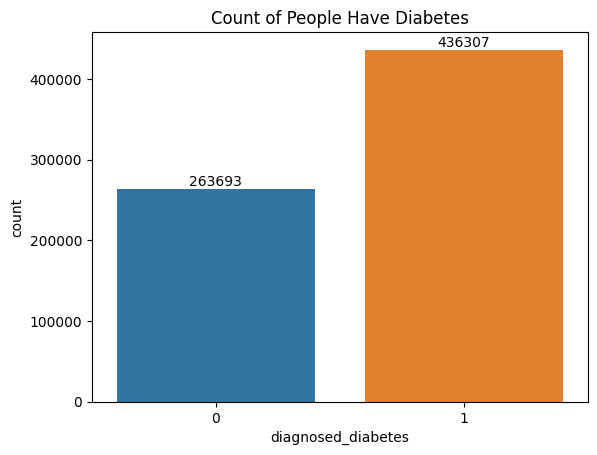

In [20]:
ax=sns.countplot(x ="diagnosed_diabetes", data= train_data)
ax.bar_label(ax.containers[0])
plt.title("Count of People Have Diabetes")
plt.show()

From above count from help us to find that more than 4 Lakhs people are have diabetes.

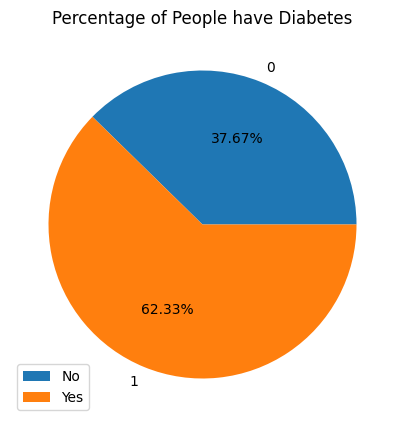

In [21]:
plt.figure(figsize=(8,5))
gb= train_data.groupby("diagnosed_diabetes").agg({"diagnosed_diabetes":"count"})
plt.pie(gb["diagnosed_diabetes"], labels= gb.index, autopct= "%1.2f%%")
plt.title("Percentage of People have Diabetes")
plt.legend(labels=["No","Yes"], fancybox=True, loc="lower left")
plt.show()

from the given pie chart we can conclude that 62% of people are having diabetes. 

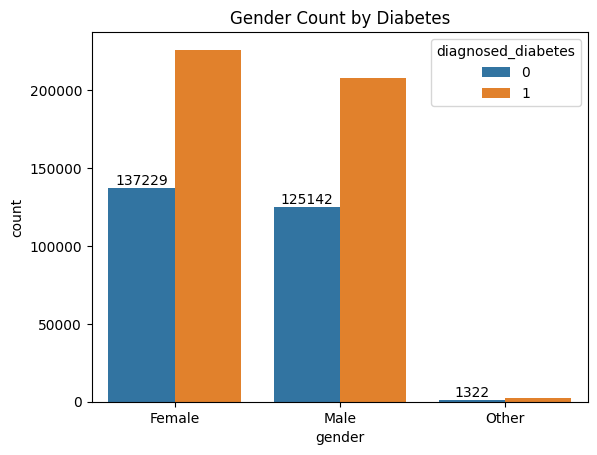

In [22]:
ax=sns.countplot(x= "gender", data=train_data, hue="diagnosed_diabetes")
ax.bar_label(ax.containers[0])
plt.title("Gender Count by Diabetes")
plt.show()

Mostly slightly difference are there in male and female in the data. Almost the count is same.

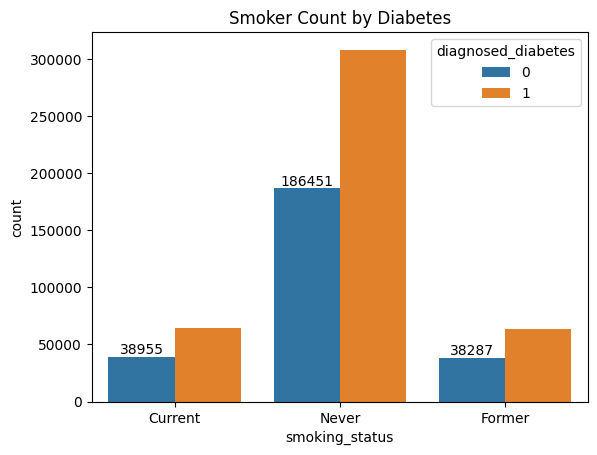

In [23]:
ax=sns.countplot(x= "smoking_status", data=train_data, hue="diagnosed_diabetes")
ax.bar_label(ax.containers[0])
plt.title("Smoker Count by Diabetes")
plt.show()

From these we can see that most of the non-smoker have diabetes.

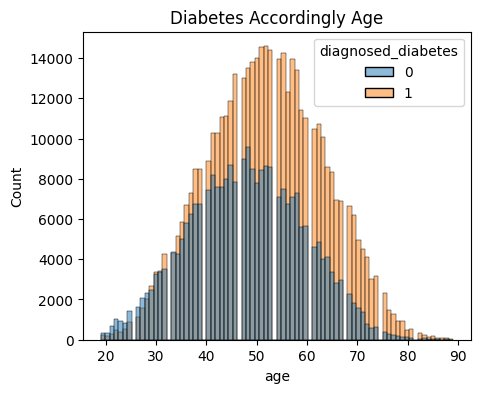

In [24]:
plt.figure(figsize=(5,4))
sns.histplot(x= "age", data=train_data, bins=80, hue="diagnosed_diabetes")
plt.title("Diabetes Accordingly Age")
plt.show()

Mostly from age 30 to 80 have the chance of the diabetes. And from these we can also see that data is normalized. 

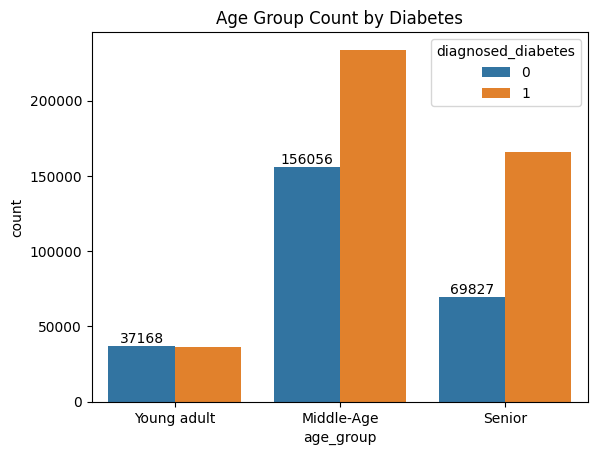

In [25]:
ax=sns.countplot(x= "age_group", data=train_data, hue="diagnosed_diabetes")
ax.bar_label(ax.containers[0])
plt.title("Age Group Count by Diabetes")
plt.show()

You can that middle-age impacting more with diabetes alsi Young adult effecting with same the sum in almost equal.

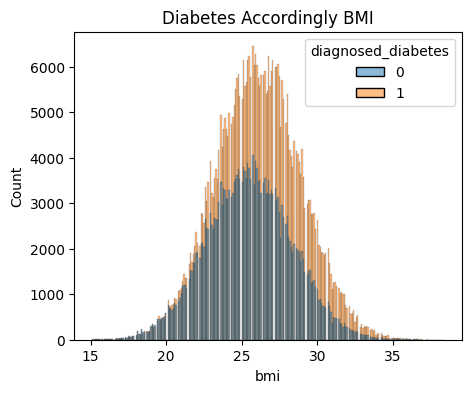

In [26]:
plt.figure(figsize=(5,4))
sns.histplot(x= "bmi", data=train_data, hue="diagnosed_diabetes")
plt.title("Diabetes Accordingly BMI")
plt.show()

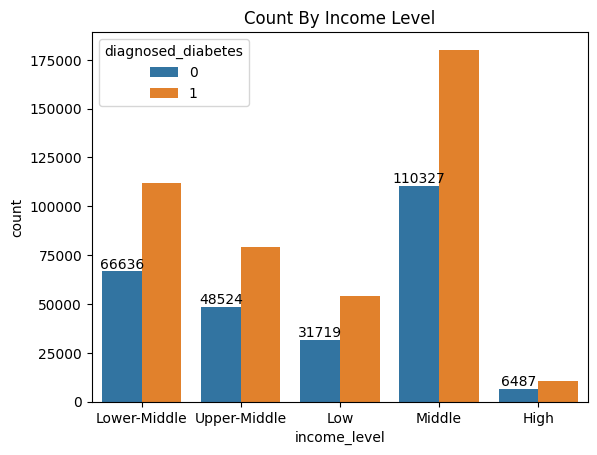

In [27]:
ax=sns.countplot(x ="income_level", data= train_data, hue="diagnosed_diabetes")
ax.bar_label(ax.containers[0])
plt.title("Count By Income Level")
plt.show()

Peple from middle class have more changes to have diabetes then high class and other.

## Data Preprocessing

In [28]:
# Converting all categorical column to contniues column in train dataset.
from sklearn.preprocessing import LabelEncoder
label_encoder={}
cat_col= train_data.select_dtypes(include=['object']).columns.tolist()

for col in cat_col:
    train_data[col]= train_data[col].astype(str)
    label_encoder[col]= LabelEncoder()
    train_data[col]= label_encoder[col].fit_transform(train_data[col])
    train_data[col]= train_data[col].astype(str)

In [29]:
# Converting all categorical column to contniues column in test dataset.
label_encoder={}
cat_col= test_data.select_dtypes(include=['object']).columns.tolist()

for col in cat_col:
    test_data[col]= test_data[col].astype(str)
    label_encoder[col]= LabelEncoder()
    test_data[col]= label_encoder[col].fit_transform(test_data[col])
    test_data[col]= test_data[col].astype(str)

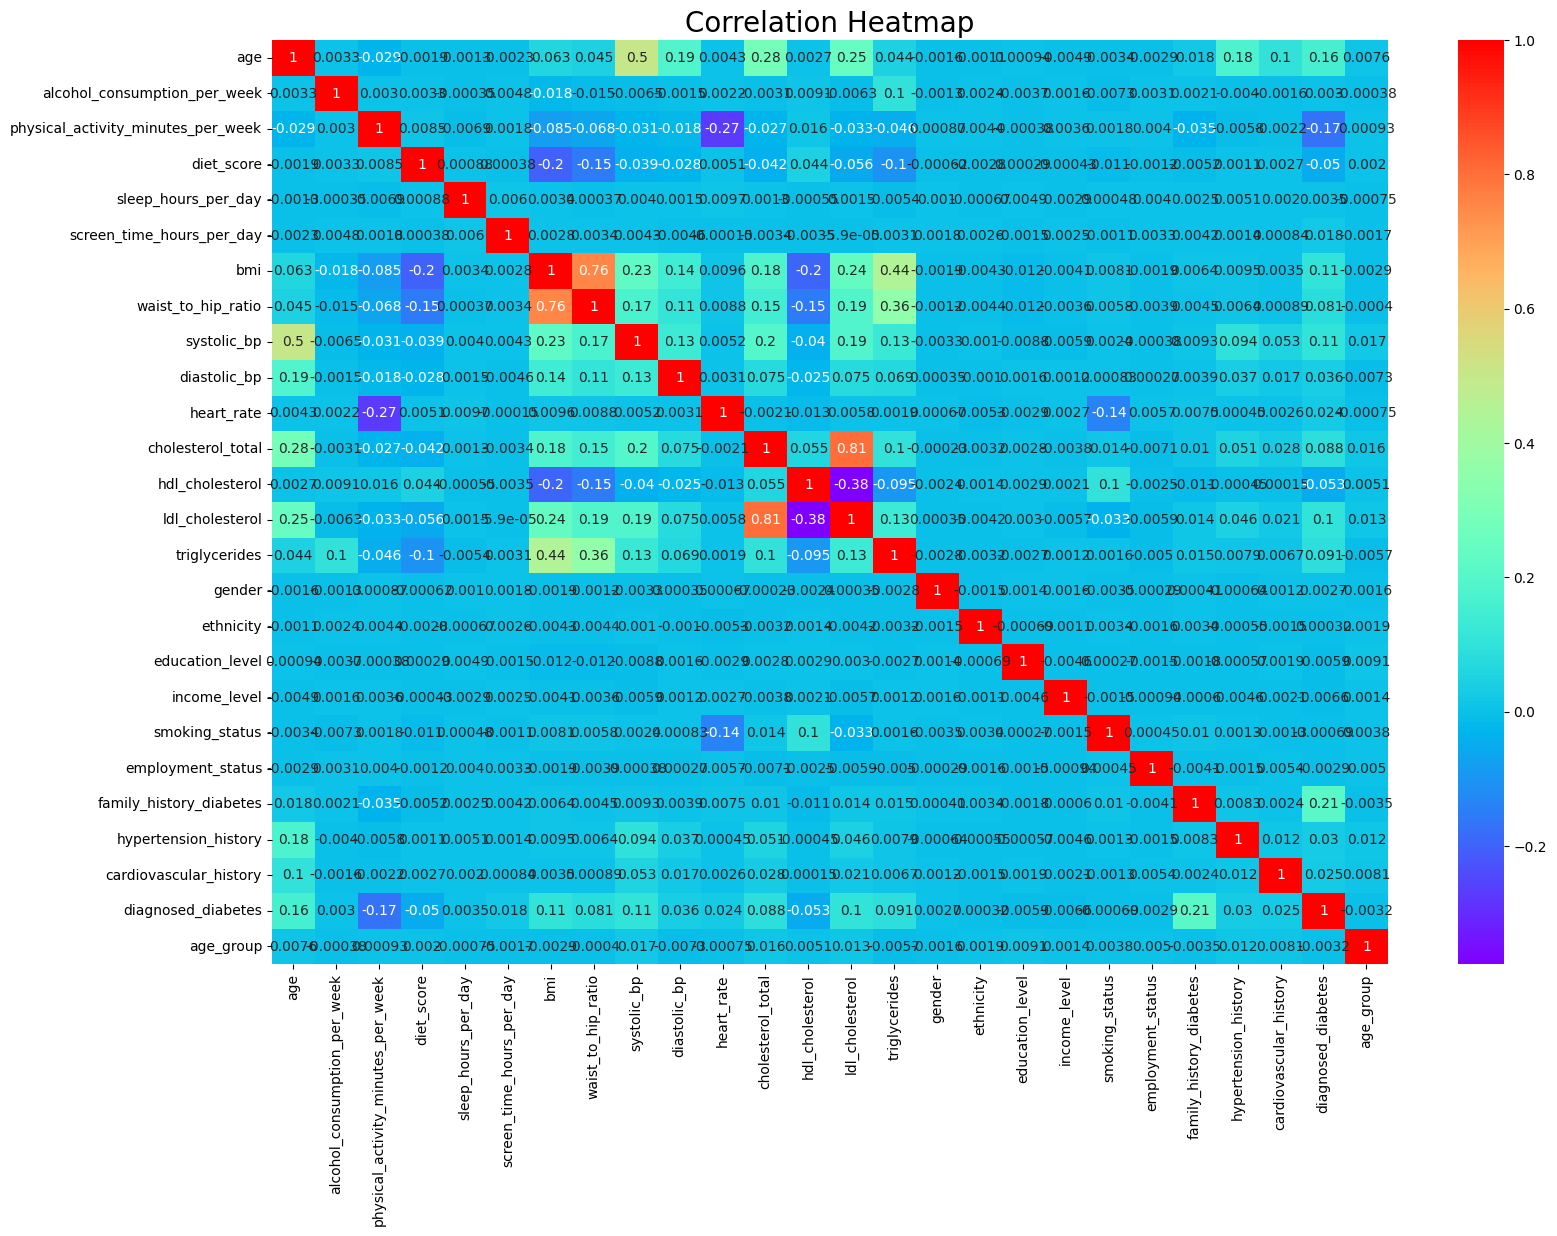

In [30]:
corrdf= train_data.corr()

plt.figure(figsize=(18,12))
sns.heatmap(corrdf, annot=True, cmap="rainbow")
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [31]:
#Checking coor relation of independent variable to target variable.
target_corr= corrdf["diagnosed_diabetes"].abs().sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.01].index.tolist()
low_corr_features= target_corr[(target_corr<0.01)].index.tolist()

print(target_corr)
print("")
print("\nSelected features between 0.1 and 0.5:")
print(selected_features)
print("")
print(len(selected_features))

print("\nLow features between 0.1 and 0.5:")
print(low_corr_features)
print("")
print(len(low_corr_features))

diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
physical_activity_minutes_per_week    0.169789
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
hdl_cholesterol                       0.053231
diet_score                            0.050119
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
income_level                          0.006562
education_level                       0.005933
sleep_hours_per_day                   0.003509
age_group                             0.003181
alcohol_consu

In [32]:
# droping the less correlacted feature from the train dataset.
train_data.drop(low_corr_features, axis=1, inplace=True)
print(train_data.shape)
train_data.head()

(700000, 17)


,age,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,45,7.7,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0,1
1,50,73,5.7,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0,1
2,32,158,8.5,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0,0
3,54,77,4.6,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0,1
4,54,55,5.7,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0,1


In [33]:
# droping the less correlacted feature from the test dataset.
low_corr=['income_level', 'education_level', 'sleep_hours_per_day', 'alcohol_consumption_per_week', 'employment_status', 'gender', 'smoking_status', 'ethnicity']

test_data.drop(low_corr, axis=1, inplace=True)
print(test_data.shape)
test_data.head()

(300000, 16)


,age,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
0,45,100,4.3,6.2,25.5,0.84,123,70,64,209,55,135,111,0,0,0
1,35,87,3.5,9.0,28.6,0.88,120,74,59,159,47,83,145,0,0,0
2,45,61,7.6,7.0,28.5,0.94,112,71,75,173,43,99,184,0,0,0
3,55,81,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,0,0,0
4,77,29,7.3,8.5,22.0,0.83,131,78,79,177,59,87,133,0,0,0


## Model Building 

In [34]:
# Spliting the dataset into train test using train_test_split
x= train_data.drop(["diagnosed_diabetes"], axis=1)
y= train_data["diagnosed_diabetes"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x,y, train_size=0.8, random_state=2410)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(560000, 16)
(560000,)
(140000, 16)
(140000,)


In [35]:
#First going with random forest classifier model
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier().fit(X_train,y_train)
y_test_predict= model.predict(X_test)

y_pred_prob_1 = model.predict_proba(X_test)[:,1]

print(y_test_predict)
print(y_pred_prob_1)

[1 1 1 ... 0 1 1]
[0.75 0.74 0.95 ... 0.42 0.6  0.85]


In [36]:
# Evaluation Report for Random Forect Classifier.
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[20465 32239]
 [15069 72227]]
              precision    recall  f1-score   support

           0       0.58      0.39      0.46     52704
           1       0.69      0.83      0.75     87296

    accuracy                           0.66    140000
   macro avg       0.63      0.61      0.61    140000
weighted avg       0.65      0.66      0.64    140000



In [37]:
# Roc auc score using Random Forest Classifier 
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob_1)
print("ROC–AUC:", roc_auc)

ROC–AUC: 0.6923799302054985


In [38]:
from sklearn.linear_model import LogisticRegression

model_lg= LogisticRegression().fit(X_train, y_train)
y_predict= model_lg.predict(X_test)

y_pred_prob_2 = model_lg.predict_proba(X_test)[:,1]

print(y_predict)
print(y_pred_prob_2)

[1 1 1 ... 0 1 1]
[0.75656158 0.66393553 0.71616895 ... 0.29955849 0.71187148 0.74373978]


In [39]:
# Evaluation Report for Logistic Regression.
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[14822 37882]
 [10492 76804]]
              precision    recall  f1-score   support

           0       0.59      0.28      0.38     52704
           1       0.67      0.88      0.76     87296

    accuracy                           0.65    140000
   macro avg       0.63      0.58      0.57    140000
weighted avg       0.64      0.65      0.62    140000



In [40]:
# Roc auc score using logistic Regression

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob_2)
print("ROC–AUC:", roc_auc)

ROC–AUC: 0.6677185941800423


In [41]:
#Standard Scaling the dataset.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(X_train)

trainSTD= scaler.transform(X_train)
testSTD= scaler.transform(X_test)

#Conversting into DataFrame
trainstd= pd.DataFrame(trainSTD, columns=X_train.columns)
teststd= pd.DataFrame(testSTD, columns=X_test.columns)

print(trainstd.shape)
print(teststd.shape)

(560000, 16)
(140000, 16)


In [42]:
#Checking the model with STD data (Logistic Regression).
lgstd= LogisticRegression().fit(trainstd, y_train)
y_prediction= lgstd.predict(X_test)
y_predict_prob= lgstd.predict_proba(X_test)[:,1]

print(y_prediction)
print(y_predict_prob)

[1 1 1 ... 0 1 1]
[1.00000000e+00 9.99999995e-01 9.99835387e-01 ... 6.89928787e-12
 9.98396399e-01 9.99525423e-01]


In [43]:
# Evaluation Report for Logistic Regression.
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[17302 35402]
 [15283 72013]]
              precision    recall  f1-score   support

           0       0.53      0.33      0.41     52704
           1       0.67      0.82      0.74     87296

    accuracy                           0.64    140000
   macro avg       0.60      0.58      0.57    140000
weighted avg       0.62      0.64      0.61    140000



In [44]:
roc_auc = roc_auc_score(y_test, y_predict_prob)
print("ROC–AUC:", roc_auc)

ROC–AUC: 0.6323965312828705


## XGBOOST MODEL

In [45]:
#Using xgboost model for better performance.
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
print(y_pred_proba)

[0.9139508  0.7321378  0.8732416  ... 0.23155263 0.6361385  0.8542795 ]


In [46]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7193995943249062


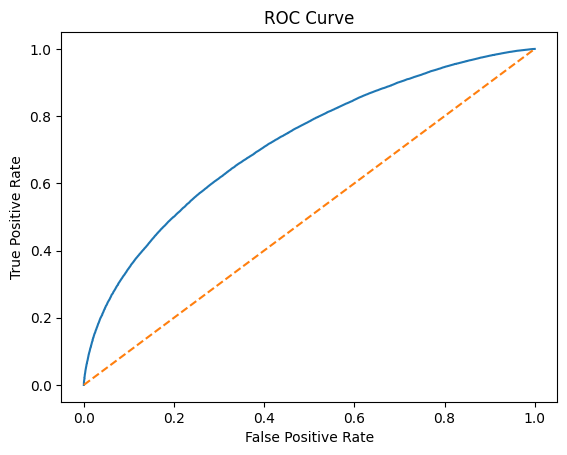

In [47]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    model, x, y, cv=cv, scoring='roc_auc'
)

print("Mean ROC AUC:", scores.mean())

Mean ROC AUC: 0.720837930374999


In [49]:
model_2 = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight = (y == 0).sum() / (y == 1).sum())

model_2.fit(X_train, y_train)

y_pred_proba_2 = model_2.predict_proba(X_test)[:, 1]
print(y_pred_proba_2)

[0.910027   0.63434094 0.7983885  ... 0.16788615 0.64043224 0.7896041 ]


In [50]:
roc_auc = roc_auc_score(y_test, y_pred_proba_2)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7217160993714675


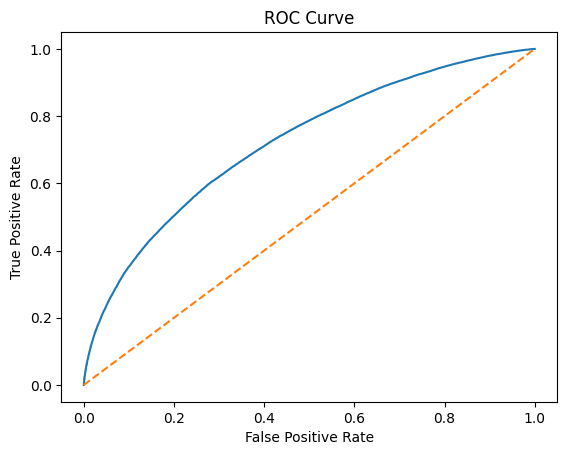

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_2)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# LightGBM Model

In [52]:
import lightgbm as lgb

#Scaling the imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [53]:
model_lgb = lgb.LGBMClassifier(
    n_estimators=1500,
    learning_rate=0.02,

    max_depth=-1,
    num_leaves=64,          
    min_child_samples=50, 

    subsample=0.8,
    subsample_freq=1,
    colsample_bytree=0.8,

    reg_alpha=0.5,          
    reg_lambda=1.0,         
    min_split_gain=0.01,

    objective='binary',
    metric='auc',
    scale_pos_weight=scale_pos_weight,

    random_state=42,
    n_jobs=-1)


In [54]:
model_lgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(50)])

[LightGBM] [Info] Number of positive: 349011, number of negative: 210989
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623234 -> initscore=0.503297
[LightGBM] [Info] Start training from score 0.503297
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.704804
[100]	valid_0's auc: 0.711176
[150]	valid_0's auc: 0.715376
[200]	valid_0's auc: 0.718162
[250]	valid_0's auc: 0.719924
[300]	valid_0's auc: 0.72162
[350]	valid_0's auc: 0.722701
[400]	valid_0's auc: 0.723429
[450]	valid_0's auc: 0.723965
[500]	valid_0's auc: 0.724394
[550]	valid_0's auc: 0.724719
[600]	valid_0's auc: 0.724951
[650]	valid_0's auc: 0.725199
[700]	valid_0's auc: 0.725404
[750]	valid_0's auc: 0.72

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, metric='auc',
               min_child_samples=50, min_split_gain=0.01, n_estimators=1500,
               n_jobs=-1, num_leaves=64, objective='binary', random_state=42,
               reg_alpha=0.5, reg_lambda=1.0,
               scale_pos_weight=0.6045339545171928, subsample=0.8,
               subsample_freq=1)

In [55]:
y_predict_lgb= model_lgb.predict(X_test)
y_pred_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]

print(y_predict_lgb)
print(y_pred_proba_lgb)

[1 1 1 ... 0 1 1]
[0.86273193 0.64047469 0.81420446 ... 0.16298534 0.54180611 0.78930821]


In [56]:
roc_auc = roc_auc_score(y_test, y_pred_proba_lgb)
print("LightGMB ROC AUC Score:", roc_auc)

LightGMB ROC AUC Score: 0.7268824381672996


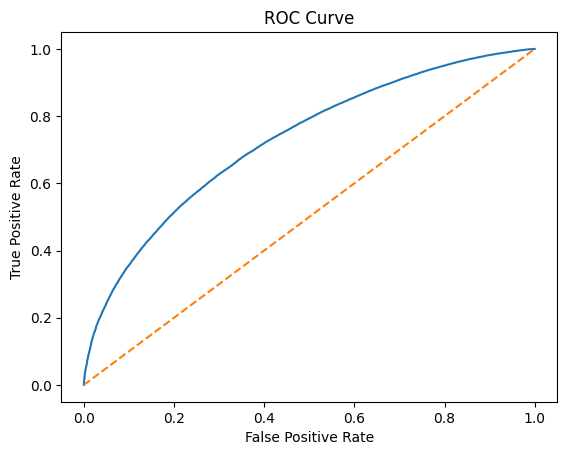

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lgb)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [58]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model_lgb,
    x,
    y,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

print("CV ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

CV ROC-AUC Scores: [0.7283837  0.72650809 0.72746711 0.72845168 0.72834324]
Mean CV ROC-AUC: 0.7278307613492374


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

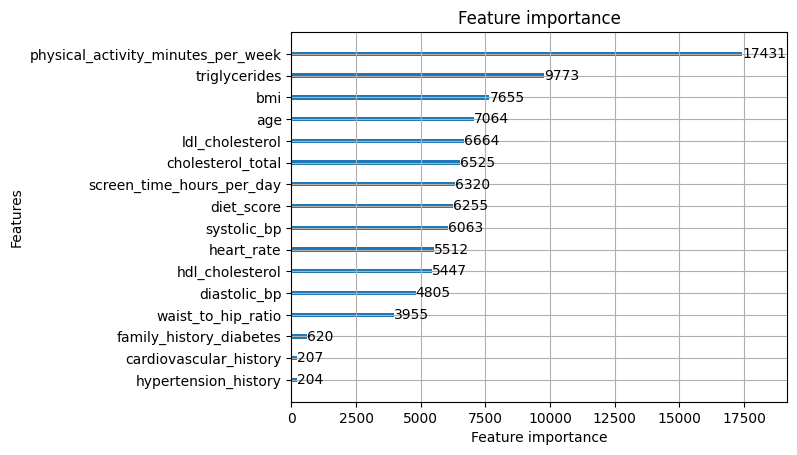

In [59]:
lgb.plot_importance(model_lgb)

In [60]:
#Predicting to unseen dataset.
final_prediction= model_lgb.predict(test_data)
y_prodict_proba_f= model_lgb.predict_proba(test_data)[:,1]

print(final_prediction)
print(y_prodict_proba_f)

[0 1 1 ... 0 0 1]
[0.36482006 0.55864729 0.66122985 ... 0.48574943 0.45617475 0.50275081]


In [61]:
#Here is the prediction on the test dataset.
test_data['diagnosed_diabetes'] = final_prediction
test_data.head()

,age,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,45,100,4.3,6.2,25.5,0.84,123,70,64,209,55,135,111,0,0,0,0
1,35,87,3.5,9.0,28.6,0.88,120,74,59,159,47,83,145,0,0,0,1
2,45,61,7.6,7.0,28.5,0.94,112,71,75,173,43,99,184,0,0,0,1
3,55,81,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,0,0,0,0
4,77,29,7.3,8.5,22.0,0.83,131,78,79,177,59,87,133,0,0,0,1


In [62]:
#Now as required submitting on the sample data.
sample_data['diagnosed_diabetes'] = final_prediction

In [63]:
sample_data.head()

,id,diagnosed_diabetes
0,700000,0
1,700001,1
2,700002,1
3,700003,0
4,700004,1


In [64]:
sample_data.to_csv('submission.csv', index=False)